In [529]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys, os

In [530]:
Path_FieldTrip = "/buffer_bci-master/dataAcq/buffer/python"
sys.path.append(os.getcwd() + Path_FieldTrip)

import FieldTrip

In [532]:
Path_Preproc = "/buffer_bci-master/python/signalproc"
sys.path.append(os.getcwd() + Path_Preproc)


import preproc

In [533]:
f = open('data_power.pk','rb')
data = pickle.load(f)

f = open('channels_configuration.pk', 'rb')
ch_32    = pickle.load(f)

f = open('channels_configuration_reverse.pk','rb')
ch_32_r    = pickle.load(f)

f = open('power_spectrum.pk','rb')
power_spectrum  = pickle.load(f)

In [549]:
value_hands = {'left':0 ,'right': 1, 'both':2, 'no':3}


Y = []

for i in power_spectrum.keys():
    print(power_spectrum[i].shape[0])
    print(value_hands[i])
    Y = Y + [value_hands[i]]*power_spectrum[i].shape[0]
Y = np.array(Y)

34
0
35
1
35
2
34
3


In [550]:
Y.shape

(138,)

In [553]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [551]:
print(power_spectrum['left'].shape)

#(79, 37, 62)
#Eventos, canais, lonxitude espectro

spectrums = np.vstack((power_spectrum['left'], power_spectrum['right'], power_spectrum['both'], power_spectrum['no']))

(34, 37, 62)


In [552]:
spectrums.shape

(138, 37, 62)

In [538]:
spectrums.resize(spectrums.shape[0], spectrums.shape[1]*spectrums.shape[2])

In [539]:
X = np.copy(spectrums)

In [540]:
X.shape 

(138, 2294)

---- 

KFold 

In [541]:
kfold = KFold(12, shuffle = True)
kfold.split(X);

In [542]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

(126, 2294)
------
True:  2   False:  10    16.6%


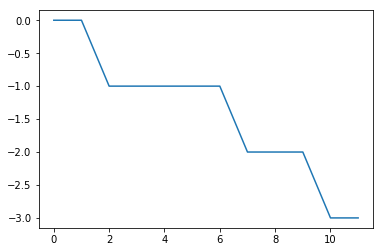

(126, 2294)
------
True:  1   False:  11    8.33%


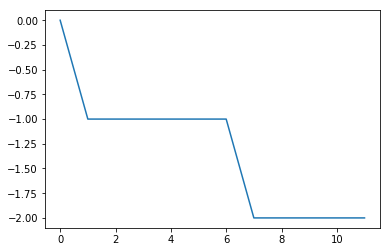

(126, 2294)
------
True:  3   False:  9    25.0%


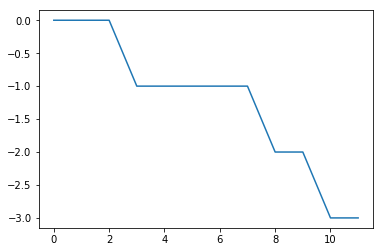

(126, 2294)
------
True:  3   False:  9    25.0%


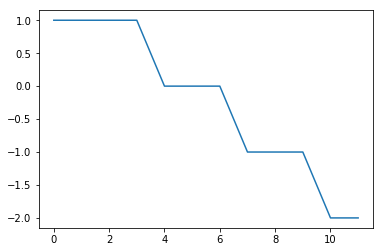

(126, 2294)
------
True:  5   False:  7    41.6%


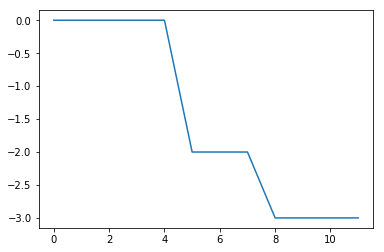

(126, 2294)
------
True:  3   False:  9    25.0%


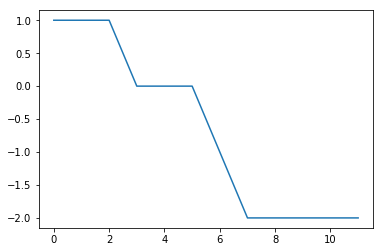

(127, 2294)
------
True:  3   False:  8    27.2%


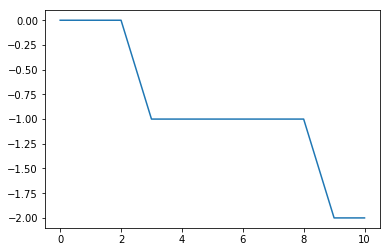

(127, 2294)
------
True:  4   False:  7    36.3%


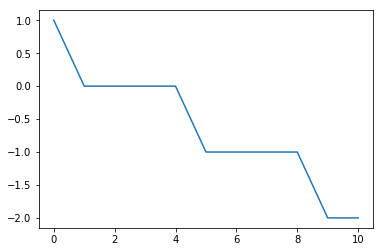

(127, 2294)
------
True:  2   False:  9    18.1%


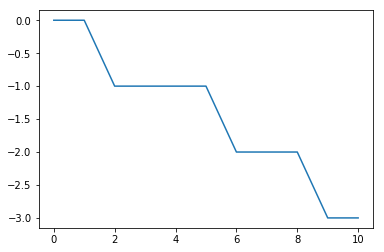

(127, 2294)
------
True:  4   False:  7    36.3%


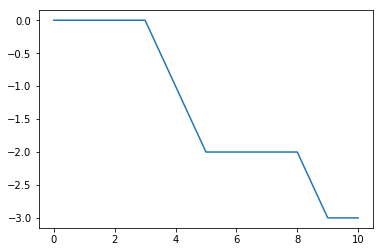

(127, 2294)
------
True:  4   False:  7    36.3%


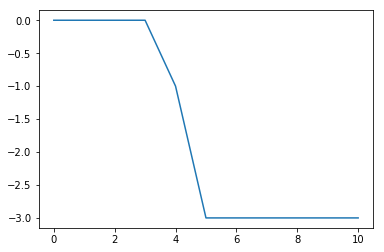

(127, 2294)
------
True:  3   False:  8    27.2%


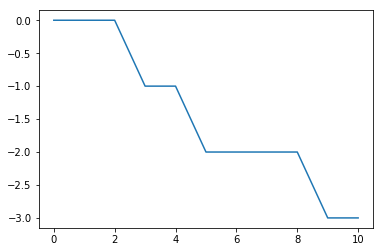

27.27272727272727


In [548]:
#classifier = RidgeCV()
#classifier = SVC()
#classifier = RandomForestClassifier(n_estimators=10)

classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=False, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

for train, test in kfold.split(X):
    #print('\n\nTrain:',train, '\nTest:', test)
    print(X[train].shape)
    classifier.fit(X[train], Y[train])
    print('------')
    #print(classifier.predict(np.round(X[test]))-Y[test])
    X_test = classifier.predict(np.round(X[test]))
    Y_test = Y[test]
    
    
    true = 0
    false = 0
    per = []
    
    for i in range(len(X[test])):
        #print(int(np.round(X_test[i])), Y_test[i], int(np.round(X_test[i])) == Y_test[i])
        if np.round(X_test[i]) == Y_test[i]:
            true  = true  + 1
        if np.round(X_test[i]) != Y_test[i]:    
            false = false + 1
    print('True: ', true, '  False: ', false, '   '+ str(true/(true+false)*100)[:4] +'%')
    per.append(true/(true+false)*100)
    plt.plot(classifier.predict(np.round(X[test]))-Y[test])
    plt.show()
print(np.mean(per))

In [544]:
 Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

--------

Left and Right Classifier 

In [627]:
selected_channels = ['C3', 'C4', 'Cz']
channel_mask = []

for channel in selected_channels:
    channel_mask.append(int(ch_32_r[channel]))

In [628]:
power_spectrum['right'][:,channel_mask,:].shape

(35, 3, 62)

In [636]:
#Right classifier

In [709]:
### Unbalanced yes (left/right and both)   and no (none)  activations 

'''X_r  =  np.vstack((power_spectrum['right'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:], power_spectrum['no'][:,channel_mask,:]))
        Y_r  =  [1]*(power_spectrum['right'][:,channel_mask,:].shape[0]+power_spectrum['both'][:,channel_mask,:].shape[0])+[0]*power_spectrum['no'][:,channel_mask,:].shape[0]
        Y_r  =  np.array(Y_r)

        print(X_r.shape, Y_r.shape)
        X_r = np.reshape(X_r,(X_r.shape[0], X_r.shape[1]*X_r.shape[2]))
        print(X_r.shape, Y_r.shape)'''

"\nX_r  =  np.vstack((power_spectrum['right'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:], power_spectrum['no'][:,channel_mask,:]))\n\nY_r  =  [1]*(power_spectrum['right'][:,channel_mask,:].shape[0]+power_spectrum['both'][:,channel_mask,:].shape[0])+[0]*power_spectrum['no'][:,channel_mask,:].shape[0]\nY_r  =  np.array(Y_r)\n\nprint(X_r.shape, Y_r.shape)"

In [721]:
def getDataRight(balanced = True):
    
    if balanced:
        X_r  =  np.vstack((power_spectrum['right'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:]))#, power_spectrum['no'][:,channel_mask,:]))

        no_shape  = power_spectrum['no'][:,channel_mask,:].shape
        yes_shape = X_r[np.random.permutation(X_r.shape[0])[:no_shape[0]]].shape

        X_r = np.vstack((X_r[np.random.permutation(X_r.shape[0])[:no_shape[0]]], power_spectrum['no'][:,channel_mask,:]))



        Y_r = np.array( yes_shape[0]*[1]+no_shape[0]*[0] )   #Order of yes and no is important


        print(X_r.shape, Y_r.shape)
        X_r = np.reshape(X_r,(X_r.shape[0], X_r.shape[1]*X_r.shape[2]))
        print(X_r.shape, Y_r.shape)

    if balanced == False:

        X_r  =  np.vstack((power_spectrum['right'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:], power_spectrum['no'][:,channel_mask,:]))
        Y_r  =  [1]*(power_spectrum['right'][:,channel_mask,:].shape[0]+power_spectrum['both'][:,channel_mask,:].shape[0])+[0]*power_spectrum['no'][:,channel_mask,:].shape[0]
        Y_r  =  np.array(Y_r)

        print(X_r.shape, Y_r.shape)
        X_r = np.reshape(X_r,(X_r.shape[0], X_r.shape[1]*X_r.shape[2]))
        print(X_r.shape, Y_r.shape)
        
    return X_r, Y_r

In [722]:
def getDataLeft(balanced = True):
    if balanced:
        X_l  =  np.vstack((power_spectrum['left'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:]))#, power_spectrum['no'][:,channel_mask,:]))

        no_shape  = power_spectrum['no'][:,channel_mask,:].shape
        yes_shape = X_l[np.random.permutation(X_r.shape[0])[:no_shape[0]]].shape
        X_l = np.vstack((X_l[np.random.permutation(X_l.shape[0])[:no_shape[0]]], power_spectrum['no'][:,channel_mask,:]))

        Y_l = np.array( yes_shape[0]*[1]+no_shape[0]*[0] )   #Order of yes and no is important


        print(X_l.shape, Y_l.shape)
        X_l = np.reshape(X_l,(X_l.shape[0], X_l.shape[1]*X_l.shape[2]))
        print(X_l.shape, Y_l.shape)
        
    if balanced == False:
        
        X_l  = np.vstack((power_spectrum['left'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:], power_spectrum['no'][:,channel_mask,:]))

        Y_l  = [1]*(power_spectrum['left'][:,channel_mask,:].shape[0]+power_spectrum['both'][:,channel_mask,:].shape[0])+[0]*power_spectrum['no'][:,channel_mask,:].shape[0]
        Y_l  = np.array(Y)
        
        print(X_l.shape, Y_l.shape)
        X_l = np.reshape(X_l,(X_l.shape[0], X_l.shape[1]*X_l.shape[2]))
        print(X_l.shape, Y_l.shape)
        
    return X_l, Y_l

In [672]:
print(X_l.shape)
X_l = np.reshape(X_l,(X_l.shape[0], X_l.shape[1]*X_l.shape[2]))
print(X_l.shape)

(68, 3, 62)
(68, 186)


In [711]:
### Unbalanced
'''
X_l  = np.vstack((power_spectrum['left'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:], power_spectrum['no'][:,channel_mask,:]))

Y_l  = [1]*(power_spectrum['left'][:,channel_mask,:].shape[0]+power_spectrum['both'][:,channel_mask,:].shape[0])+[0]*power_spectrum['no'][:,channel_mask,:].shape[0]
Y_l  = np.array(Y)'''

"\nX_l  = np.vstack((power_spectrum['left'][:,channel_mask,:], power_spectrum['both'][:,channel_mask,:], power_spectrum['no'][:,channel_mask,:]))\n\nY_l  = [1]*(power_spectrum['left'][:,channel_mask,:].shape[0]+power_spectrum['both'][:,channel_mask,:].shape[0])+[0]*power_spectrum['no'][:,channel_mask,:].shape[0]\nY_l  = np.array(Y)"

In [712]:
import copy

In [865]:
kfold = KFold(10, shuffle = True)
kfold.split(X);

#classifier = RidgeCV()
#classifier = SVC()
#classifier = RandomForestClassifier(n_estimators=10)
classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=False, tol=1e-4, random_state=1, learning_rate_init=.1)

verbose = False

side = 'R'


if side == 'R':
    X, Y = getDataRight(balanced = False)
    
    
if side == 'L':
    X, Y =  getDataLeft(balanced = False)

    
print(side, X.shape, Y.shape)
    

    
for train, test in kfold.split(X):
    if verbose: print(X[train].shape)
        
    classifier.fit(X[train], Y[train])
    
    if verbose: print('------')
    if verbose: print('Predict \ Y')
    if verbose: print(np.round(classifier.predict(X[test])).astype(int))
    print(X[test].shape)
    if verbose: print(Y[test])
    #X_test = np.logical_not(classifier.predict(np.round(X[test]))).astype(int)   ##Reversed results
    X_test = classifier.predict(np.round(X[test]))                                ## Not Reversed results
    Y_test = Y[test]
    
    
    true = 0
    false = 0
    per = []
    
    for i in range(len(X[test])):
        if verbose: print(int(np.round(X_test[i])), Y_test[i], int(np.round(X_test[i])) == Y_test[i])
        if np.round(X_test[i]) == Y_test[i]:
            true  = true  + 1
        if np.round(X_test[i]) != Y_test[i]:    
            false = false + 1
    if verbose: print('True: ', true, '  False: ', false, '   '+ str(true/(true+false)*100)[:4] +'%')
    per.append(true/(true+false)*100)
    #plt.plot(classifier.predict(np.round(X[test]))-Y[test])
    #plt.show()
    
    if side == 'L':
        classifier_left  = copy.deepcopy(classifier)
    
    if side == 'R':
        classifier_right = copy.deepcopy(classifier)
    
print('\n\n\n***** Mean *****\n')

print(np.mean(per)) 

(104, 3, 62) (104,)
(104, 186) (104,)
R (104, 186) (104,)
(11, 186)
(11, 186)
(11, 186)
(11, 186)
(10, 186)
(10, 186)
(10, 186)
(10, 186)
(10, 186)
(10, 186)



***** Mean *****

20.0


---------

Continuous data

In [779]:
def preprocessing(data, fsample = 250, band = [6,13,20,27]):
    data           =   np.array(data)   #data support variable
    data           =   np.transpose(data)
    data           =   preproc.detrend(data);
    data           =   preproc.spatialfilter(data, type = 'car')
    data, freqs    =   preproc.powerspectrum(data,dim = 1,fSample= 250);
    data,freqIdx   =   preproc.selectbands(data,dim=1,band=band,bins=freqs);
    #goodtr, badtr  =   preproc.outlierdetection(data, dim = 2)
    #data = data[:,:, goodtr]
    
    print(data.shape)
    #print('FreqID')
    #print(np.unique(freqIdx, return_counts=True))
    
    return data, freqID

In [797]:
cont_data = []

for cont in sorted(glob.glob('data_2/*conti*')):
    f = open(cont, 'rb')
    cont_data.append(pickle.load(f))

In [798]:
print(cont_data[0]['data'][0].shape)

(6250, 37)


In [819]:
cont_data2

array([10979.484, 10979.228, 10979.068, ..., 11118.676, 11114.874,
       11112.536], dtype=float32)

[1 0 3 0]
(6250, 3)
1
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


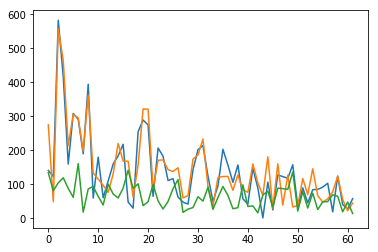

[1] [1.]
-----
2
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


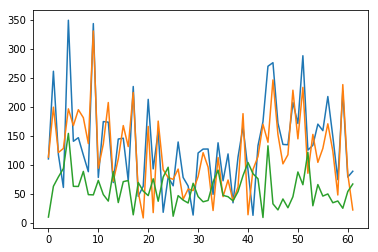

[1] [1.]
-----
3
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


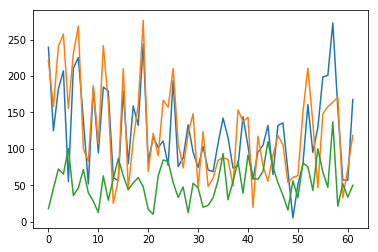

[1] [1.]
-----
4
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


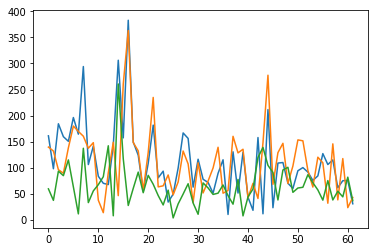

[1] [0.]
-----
5
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


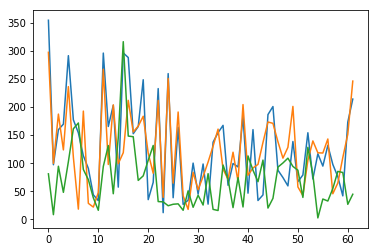

[1] [0.]
-----
6
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


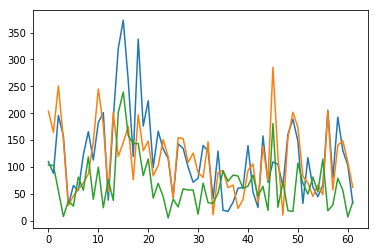

[1] [1.]
-----
7
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


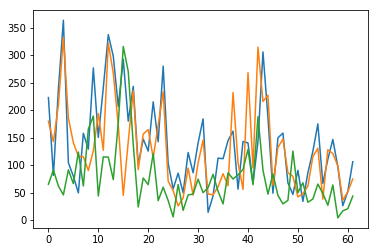

[1] [1.]
-----
8
(3, 62)
FreqID
(array([False,  True]), array([313,  62]))
(3, 62)


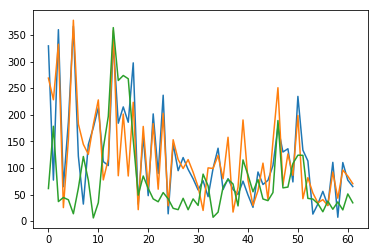

[1] [1.]
-----


In [859]:
print(cont_data[2]['events'][0].value)

cont_data2 = cont_data[0]['data'][0][:,channel_mask]

print(cont_data2.shape)

fSample = 250
sec = 3

cont = 1

for i in np.arange(250*sec,6250,250*sec):
    print(cont)
    
    #print(cont_data2[(i-sec*fSample):i].shape)
    #print(cont_data2[(i-sec*fSample):i])
    
    cont = cont +1
    
    data = preprocessing(cont_data2[(i-sec*fSample):i])
    
    print(data.shape)
    
    plt.plot(data[0,:])
    plt.plot(data[1,:])
    plt.plot(data[2,:])
    plt.show()
    
    data = np.reshape(data, (1,-1))
    print(np.round(classifier_left.predict(data)).astype(int), np.round(classifier_right.predict(data)))
    
    data = np.resize(data, (data.shape[0]*data.shape[1]))
    #plt.plot(data)
    #plt.show()
    
    print('-----')

In [784]:
for i in range():
    cont_data[0]['data'][0][]

(6250, 37)

In [775]:
data_block_reshape = np.array(np.split(cont_data[0]['data'][0][:,channel_mask],25))

for i in range(data_block_reshape.shape[0]):
    data_block_reshape[i, :].shape



 ******  0  *******
(3, 20)
FreqID
(array([False,  True]), array([105,  20]))


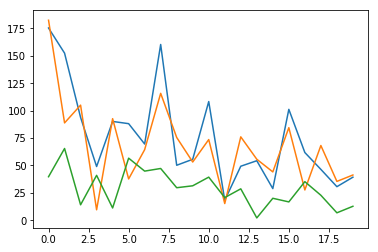

ValueError: shapes (60,1) and (186,) not aligned: 1 (dim 1) != 186 (dim 0)

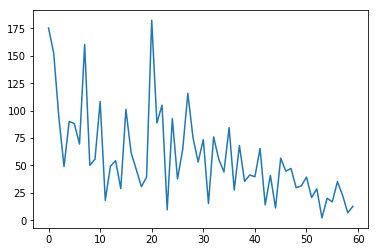

In [776]:
for i in range(data_block_reshape.shape[0]):
    print('\n\n ******  '+ str(i) +'  *******')
    data = preprocessing(data_block_reshape[i, :])
    plt.plot(data[0,:])
    plt.plot(data[1,:])
    plt.plot(data[2,:])
    data = np.resize(data, (data.shape[0]*data.shape[1]))
    plt.show()
    plt.plot(data)
    data = np.reshape(data, (-1,1))
    classifier.predict(data)
    plt.show()